### WEEK 3: PHASE 3
ML Fundamentals (Cont'd) & Logistic Regression

### ML Fundamentals RECAP

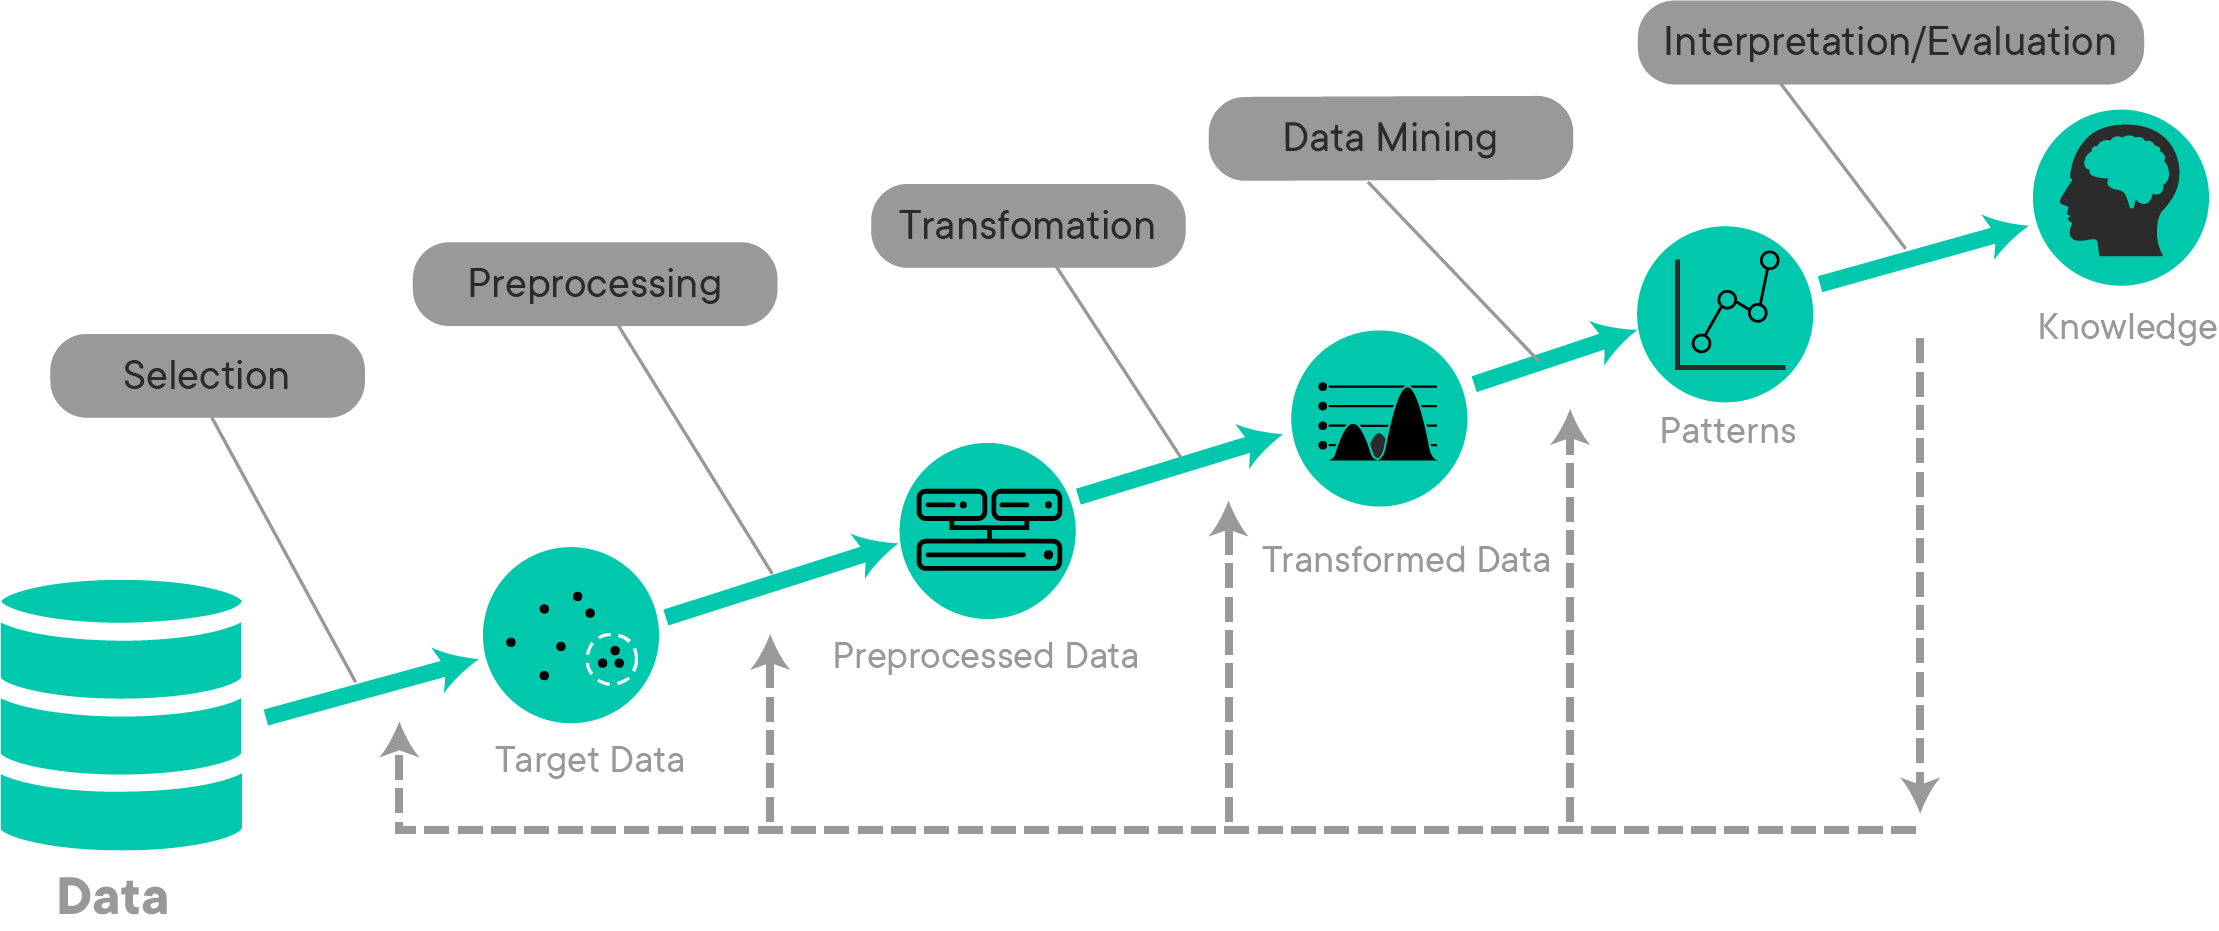

# **Regularization in Regression: Enhancing Model Robustnes**

Regularization is a technique to prevent overfitting in machine learning models, especially regressions.
- Overfitting happens when a model learns noise or irrelevant patterns in the training data, leading to poor performance on new data (high variance).
- It also helps with multicollinearity (when features are highly correlated) and feature selection (by shrinking or eliminating coefficients).

When to apply it:

1.  When your model shows signs of overfitting (e.g. great training RMSE but poor validation RMSE from cross-validation).
2.  In high-dimensional settings (more features than samples) or when features are correlated.
3. During hyperparameter tuning, often combined with cross-validation.
Not always needed: Skip if your dataset is small, simple, or if non-regularized linear regression already generalizes well.
4. Appropriate for feature selection when you suspect redundant features, use Lasso for automatic selection, Ridge for shrinkage without elimination.

### Error Base Metrics = Mean Squared error

Overfitting = lRM which sports an athlete plays using their heights

penalty - cut out (for all high values that we have in out target variables (shrink them)

Y = (a0+a1*height)+ a2*height2 +a3*height3+a4*height*4
Y = (a0+a1*height)+ a2*height2


Multiply something to the power of 0 or to zero itslef = canceling it



MSE - 1/N(SUM n i=1 (y1 - y1)2 + theta(sum m i=1|w1|)
w1= basolute value of our coffeficints  lasso regression - ovverfed our model
 mse 0.6ft


Ridge Rregression - multicollinearity
 MSE - 1/N(SUM n i=1 (y1 - y1)2 + theta(sum m i=1|w*w|)

# 1: LASSO REGRESSION

Lasso (Least Absolute Shrinkage and Selection Operator) is a type of linear regression with L1 regularization. It adds a penalty equal to the absolute value of the coefficients to the loss function.

Key effects:

1. Shrinks coefficients toward zero.
2. Can set some coefficients exactly to zero, performing built-in feature selection.
3. Useful for sparse models (many irrelevant features).

# 2: Ridge Regression

Ridge (also known as Tikhonov regularization) is linear regression with L2 regularization. It adds a penalty equal to the square of the coefficients.

Key effects:
1. Shrinks coefficients toward zero but rarely sets them exactly to zero.
2. Handles multicollinearity well by distributing shrinkage across correlated features.
3. Keeps all features but reduces their impact, leading to more stable models.

### HANDS ON LABS

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

In [3]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## Train Test Split

In [6]:
X = diabetes.data ## All the columns we think would have a correlation / linear rlship to Y
y = diabetes.target  ## Whether they have diabetes or not

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

This will be in V2 of our model ( v1 was the orginal linear regression model we evaluated and was overfitted)

In [9]:
scaler =StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.fit_transform(X_test)

## Training V2 of our model (the model standardised data)

In [10]:
lr = LinearRegression()
lr.fit(X_train_Scaled,y_train)
y_pred = lr.predict(X_test_Scaled)

Evaluation V2

In [12]:
print("RSME: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2_Score: ",r2_score(y_test,y_pred))
print("Coefficient:",lr.coef_)

RSME:  54.523862066987896
R2_Score:  0.43888894168947257
Coefficient: [  1.75375799 -11.51180908  25.60712144  16.82887167 -44.44885564
  24.64095356   7.67697768  13.1387839   35.16119521   2.35136365]


Penalize (Introduce Regularization)


In [13]:
# @title
## Define Alpha  (1.0), initialize either ridge or lasso regression
## Ridge (Square the absolute value of our coefficient)
ridge = Ridge (alpha =1.0) ### penalty strength    0 =ordinary linear regression, 1= medium, 10, 100 (very small coefficients)
ridge.fit(X_train_Scaled,y_train) #training it on a ridge regression (regularization)
pred_y_ridge = ridge.predict(X_test_Scaled) # predicting on ridge regression
print("Ridge RSME: ",np.sqrt(mean_squared_error(y_test,pred_y_ridge)))

Ridge RSME:  54.37158800635856


In [15]:
## Lasso Regression = Overfed
## The absolute value of our coefficients
lasso =Lasso(alpha=1.0)
lasso.fit(X_train_Scaled,y_train)
pred_y_lasso = lasso.predict(X_test_Scaled)
print("Lasso RSME: ",np.sqrt(mean_squared_error(y_test,pred_y_lasso)))
print("Coefficient:",lasso.coef_)

Lasso RSME:  53.604840647137905
Coefficient: [ 0.68703212 -9.29751904 26.21922482 15.65731357 -8.2281718  -0.
 -9.02408714  3.42086059 22.63646533  2.09864712]
